In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.read_csv('../../_data/_raw/movies.csv')

In [3]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [5]:
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


<AxesSubplot:>

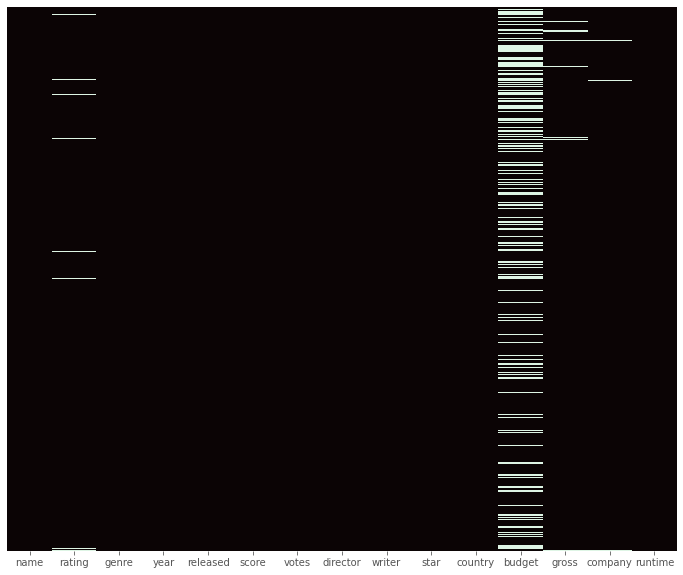

In [6]:
# Check for missing values
plt.figure(figsize=(12,10))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='mako')

In [7]:
# Predict Budget Values
# Drop other values
df.dropna(subset=['rating'],axis=0, inplace=True)

<AxesSubplot:>

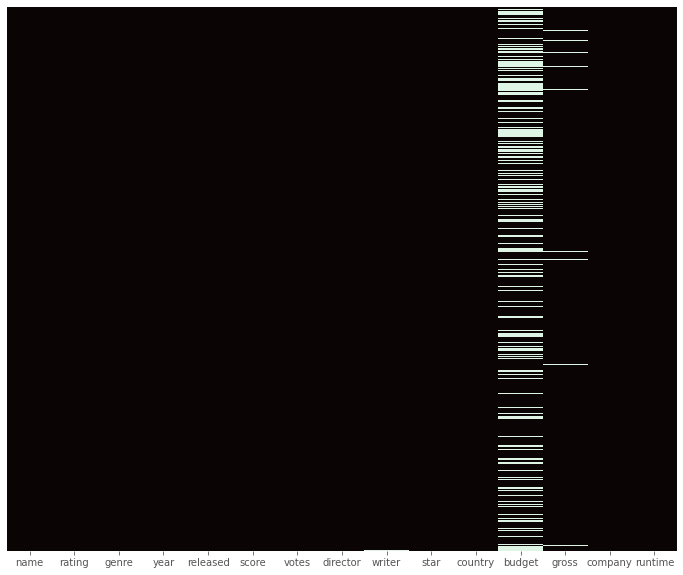

In [8]:
# Now only the budget column has missing values
plt.figure(figsize=(12,10))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='mako')

In [9]:
# WAIT! Theres actually a handfull of other missing values that we couldn't see
print('Missing Count')
df.isnull().sum()

Missing Count


name           0
rating         0
genre          0
year           0
released       2
score          1
votes          1
director       0
writer         3
star           0
country        2
budget      2114
gross        166
company       12
runtime        3
dtype: int64

In [10]:
print('Percent missing')
df.isnull().sum()/len(df)* 100

Percent missing


name         0.000000
rating       0.000000
genre        0.000000
year         0.000000
released     0.026347
score        0.013173
votes        0.013173
director     0.000000
writer       0.039520
star         0.000000
country      0.026347
budget      27.848768
gross        2.186800
company      0.158082
runtime      0.039520
dtype: float64

In [11]:
# Drop other values that are missing since they are a handful
df.dropna(subset=['released', 'score', 'votes', 'writer','country', 'gross', 'company', 'runtime'],axis=0, inplace=True)

In [12]:
# Check missing values  
df.isnull().sum()

name           0
rating         0
genre          0
year           0
released       0
score          0
votes          0
director       0
writer         0
star           0
country        0
budget      1991
gross          0
company        0
runtime        0
dtype: int64

In [13]:
initial_df_count = len(df['budget'])
missing_budget_count = df.isnull()['budget'].sum()
print(len(df['budget']))
print(df.isnull()['budget'].sum())
print(df.isnull()['budget'].sum() / len(df['budget']))

7412
1991
0.2686184565569347


In [14]:
# a DF with only nulls from budget
budget_null = df[df['budget'].isnull()]

In [15]:
# a DF with only values from budget
budget_notnull = df[df['budget'].notnull()]

In [16]:
# All genres in not null budget and null list (Need to make sure they match exactly before impute)
genre_notnull = list(budget_notnull['genre'].value_counts().keys())
genre_null = list(budget_null['genre'].value_counts().keys())
print('Not Null',sorted(genre_notnull))
print('Null',sorted(genre_null))

Not Null ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'Western']
Null ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'Western']


In [17]:
# Create a list of genres to drop from both
drop_genre = []
for genre in genre_null:
    if genre not in genre_notnull:
        drop_genre.append(genre)
for genre in genre_notnull:
    if genre not in genre_null:
        drop_genre.append(genre)
drop_genre

['Music', 'Sport', 'Musical']

In [18]:
# All ratings in not null budget and null list (Need to make sure they match exactly before impute)
rating_notnull =list(budget_notnull['rating'].value_counts().keys())
rating_null = list(budget_null['rating'].value_counts().keys())
print('Not Null',sorted(rating_notnull))
print('Null',sorted(rating_null))

Not Null ['Approved', 'G', 'NC-17', 'Not Rated', 'PG', 'PG-13', 'R', 'TV-MA', 'Unrated', 'X']
Null ['G', 'NC-17', 'Not Rated', 'PG', 'PG-13', 'R', 'TV-14', 'TV-MA', 'TV-PG', 'Unrated', 'X']


In [19]:
# Create a list of ratings to drop from both
drop_rating = []
for rating in rating_null:
    if rating not in rating_notnull:
        drop_rating.append(rating)
for rating in rating_notnull:
    if rating not in rating_null:
        drop_rating.append(rating)
drop_rating
    

['TV-PG', 'TV-14', 'Approved']

In [20]:
# Drop genre and rating from both null and not null columns
budget_null = budget_null[budget_null['genre'].isin(drop_genre) == False]
budget_notnull = budget_notnull[budget_notnull['genre'].isin(drop_genre) == False]
budget_null = budget_null[budget_null['rating'].isin(drop_rating) == False]
budget_notnull = budget_notnull[budget_notnull['rating'].isin(drop_rating) == False]

In [21]:
# Verify drops were completed and confirm columns all match
print('Not Null',sorted(list(budget_notnull['genre'].value_counts().keys())))
print('Null',sorted(list(budget_null['genre'].value_counts().keys())))
print('\n')
print('Not Null',sorted(list(budget_notnull['rating'].value_counts().keys())))
print('Null',sorted(list(budget_null['rating'].value_counts().keys())))

Not Null ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'Western']
Null ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'Western']


Not Null ['G', 'NC-17', 'Not Rated', 'PG', 'PG-13', 'R', 'TV-MA', 'Unrated', 'X']
Null ['G', 'NC-17', 'Not Rated', 'PG', 'PG-13', 'R', 'TV-MA', 'Unrated', 'X']


<AxesSubplot:>

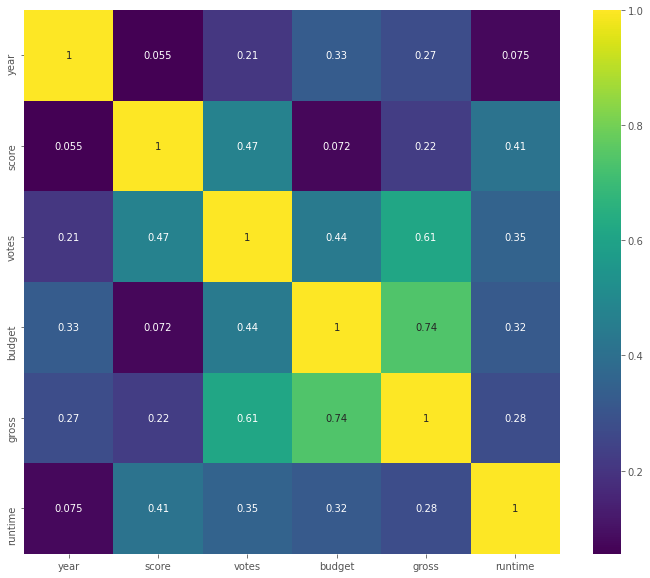

In [22]:
# Show correlation bewtween features
plt.figure(figsize=(12,10))
sns.heatmap(budget_notnull.corr(), cmap='viridis', annot=True)

In [23]:
# Take a look at which columns we can discard visually
budget_notnull.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [24]:
budget_notnull.columns
# ['name', 'year', 'released', 'country']

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [25]:
# Drop unneeded columns
budget_drop = budget_notnull.drop(['name', 'year', 'released', 'country'], axis=1)

In [26]:
# Check how many unique values there are to know how many dummy variables might be needed
for col in ['rating','genre','director', 'writer', 'star', 'company']:
    print(col, budget_drop[col].nunique())

rating 9
genre 15
director 2063
writer 3204
star 1845
company 1475


In [27]:
# Drop features with too many uniques values such as dirctor...writer..star...company
budget_drop = budget_drop.drop(['director','writer', 'star', 'company'], axis=1)

In [28]:
budget_drop.head()

,rating,genre,score,votes,budget,gross,runtime
0,R,Drama,8.4,927000.0,19000000.0,46998772.0,146.0
1,R,Adventure,5.8,65000.0,4500000.0,58853106.0,104.0
2,PG,Action,8.7,1200000.0,18000000.0,538375067.0,124.0
3,PG,Comedy,7.7,221000.0,3500000.0,83453539.0,88.0
4,R,Comedy,7.3,108000.0,6000000.0,39846344.0,98.0


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X = budget_drop.drop('budget', axis=1)
y = budget_drop['budget']

In [31]:
X.head()

,rating,genre,score,votes,gross,runtime
0,R,Drama,8.4,927000.0,46998772.0,146.0
1,R,Adventure,5.8,65000.0,58853106.0,104.0
2,PG,Action,8.7,1200000.0,538375067.0,124.0
3,PG,Comedy,7.7,221000.0,83453539.0,88.0
4,R,Comedy,7.3,108000.0,39846344.0,98.0


In [32]:
X = pd.get_dummies(data=X, columns=['rating','genre'], drop_first=True)

In [33]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5420 entries, 0 to 7652
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   score             5420 non-null   float64
 1   votes             5420 non-null   float64
 2   gross             5420 non-null   float64
 3   runtime           5420 non-null   float64
 4   rating_NC-17      5420 non-null   uint8  
 5   rating_Not Rated  5420 non-null   uint8  
 6   rating_PG         5420 non-null   uint8  
 7   rating_PG-13      5420 non-null   uint8  
 8   rating_R          5420 non-null   uint8  
 9   rating_TV-MA      5420 non-null   uint8  
 10  rating_Unrated    5420 non-null   uint8  
 11  rating_X          5420 non-null   uint8  
 12  genre_Adventure   5420 non-null   uint8  
 13  genre_Animation   5420 non-null   uint8  
 14  genre_Biography   5420 non-null   uint8  
 15  genre_Comedy      5420 non-null   uint8  
 16  genre_Crime       5420 non-null   uint8  


In [34]:
# Use Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [35]:
drop = X.drop(['score', 'runtime'], axis=1)

In [36]:
vif_data = pd.DataFrame()
vif_data['feature'] = drop.columns
vif_data['VIF'] = [variance_inflation_factor(drop.values, col) for col in range(len(drop.columns))]

In [37]:
# Drop if 5 or greater
vif_data.sort_values('VIF', ascending=False)

,feature,VIF
6,rating_R,2.737376
1,gross,2.501460
0,votes,2.346596
5,rating_PG-13,2.233055
13,genre_Comedy,2.087289
4,rating_PG,1.834283
15,genre_Drama,1.639777
14,genre_Crime,1.347833
10,genre_Adventure,1.276744
11,genre_Animation,1.276456


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X.drop(['score', 'runtime'], axis=1), y, test_size=0.3, random_state=13)

# Linear Regression

MAE 17,642,217.21
MSE 713,192,700,218,458.38
RMSE 26,705,667.94
MAPE 5.56 %
R^2 57.88 %


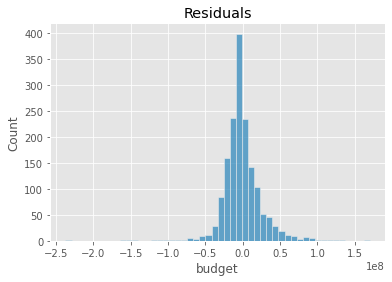

In [39]:

from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Create Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Save model predictions
metrics_index = ['MAE', 'MSE', 'RMSE', 'MAPE', 'Variance Explained']
metrics_df = pd.DataFrame(index=metrics_index)
metrics_df['Linear Regression'] = [
        metrics.mean_absolute_error(y_test, lr_predictions),  
        metrics.mean_squared_error(y_test, lr_predictions),
        np.sqrt(metrics.mean_squared_error(y_test, lr_predictions)), 
        metrics.mean_absolute_percentage_error(y_test, lr_predictions),
        metrics.explained_variance_score(y_test, lr_predictions)]

plt.title('Residuals')
sns.histplot(y_test - lr_predictions, bins=50)

# Measure Model
print(f'MAE {metrics.mean_absolute_error(y_test, lr_predictions):,.2F}')
print(f'MSE {metrics.mean_squared_error(y_test, lr_predictions):,.2F}')
print(f'RMSE {np.sqrt(metrics.mean_squared_error(y_test, lr_predictions)):,.2F}')
print(f'MAPE {metrics.mean_absolute_percentage_error(y_test, lr_predictions):,.2F} %')
print(f'R^2 {metrics.explained_variance_score(y_test, lr_predictions)* 100:,.2F} %')

# Decision Tree

MAE 23,524,775.49
MSE 1,306,659,442,081,303.00
RMSE 36,147,744.63
MAPE 3.44 %
R^2 22.83 %


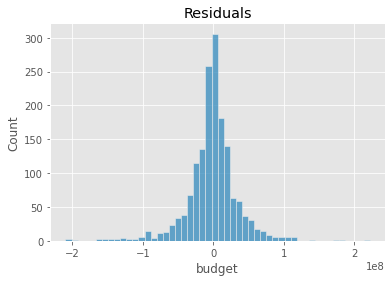

In [40]:

from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
metrics_df['Decision Tree'] = [
        metrics.mean_absolute_error(y_test, dt_predictions),  
        metrics.mean_squared_error(y_test, dt_predictions),
        np.sqrt(metrics.mean_squared_error(y_test, dt_predictions)), 
        metrics.mean_absolute_percentage_error(y_test, dt_predictions),
        metrics.explained_variance_score(y_test, dt_predictions)]

plt.title('Residuals')
sns.histplot(y_test - dt_predictions, bins=50)
print(f'MAE {metrics.mean_absolute_error(y_test, dt_predictions):,.2F}')
print(f'MSE {metrics.mean_squared_error(y_test, dt_predictions):,.2F}')
print(f'RMSE {np.sqrt(metrics.mean_squared_error(y_test, dt_predictions)):,.2F}')
print(f'MAPE {metrics.mean_absolute_percentage_error(y_test, dt_predictions):,.2F} %')
print(f'R^2 {metrics.explained_variance_score(y_test, dt_predictions)* 100:,.2F} %')

# Rainforest

MAE 17,635,117.42
MSE 698,619,643,352,356.25
RMSE 26,431,413.95
MAPE 4.20 %
R^2 58.86 %


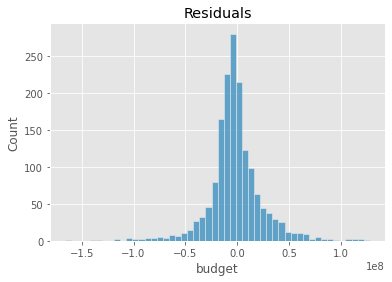

In [41]:

from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=200)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
metrics_df['Rainforest'] = [
        metrics.mean_absolute_error(y_test, rf_predictions),  
        metrics.mean_squared_error(y_test, rf_predictions),
        np.sqrt(metrics.mean_squared_error(y_test, rf_predictions)), 
        metrics.mean_absolute_percentage_error(y_test, rf_predictions),
        metrics.explained_variance_score(y_test, rf_predictions)]

plt.title('Residuals')
sns.histplot(y_test - rf_predictions, bins=50)
print(f'MAE {metrics.mean_absolute_error(y_test, rf_predictions):,.2F}')
print(f'MSE {metrics.mean_squared_error(y_test, rf_predictions):,.2F}')
print(f'RMSE {np.sqrt(metrics.mean_squared_error(y_test, rf_predictions)):,.2F}')
print(f'MAPE {metrics.mean_absolute_percentage_error(y_test, rf_predictions):,.2F} %')
print(f'R^2 {metrics.explained_variance_score(y_test, rf_predictions)* 100:,.2F} %')

# Support Vector

MAE 25,501,109.42
MSE 1,906,742,654,790,477.25
RMSE 43,666,264.49
MAPE 7.03 %
R^2 0.00 %


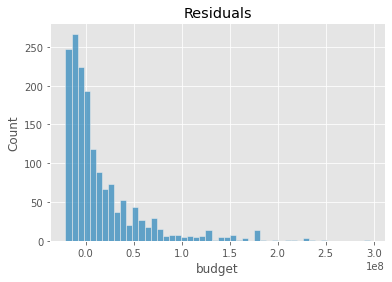

In [42]:

from sklearn.svm import SVR
sv_model = SVR()
sv_model.fit(X_train, y_train)
sv_predictions = sv_model.predict(X_test)
metrics_df['Support Vector'] = [
        metrics.mean_absolute_error(y_test, sv_predictions),  
        metrics.mean_squared_error(y_test, sv_predictions),
        np.sqrt(metrics.mean_squared_error(y_test, sv_predictions)), 
        metrics.mean_absolute_percentage_error(y_test, sv_predictions),
        metrics.explained_variance_score(y_test, sv_predictions)]

plt.title('Residuals')
sns.histplot(y_test - sv_predictions, bins=50)
print(f'MAE {metrics.mean_absolute_error(y_test, sv_predictions):,.2F}')
print(f'MSE {metrics.mean_squared_error(y_test, sv_predictions):,.2F}')
print(f'RMSE {np.sqrt(metrics.mean_squared_error(y_test, sv_predictions)):,.2F}')
print(f'MAPE {metrics.mean_absolute_percentage_error(y_test, sv_predictions):,.2F} %')
print(f'R^2 {metrics.explained_variance_score(y_test, sv_predictions)* 100:,.2F} %')

# Nearest Neighbor

MAE 18,629,167.29
MSE 760,182,016,929,382.38
RMSE 27,571,398.53
MAPE 4.82 %
R^2 55.06 %


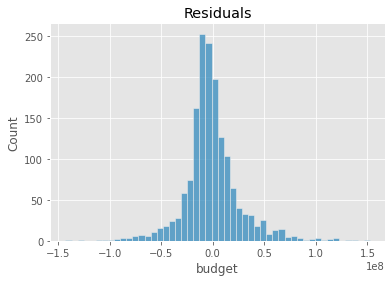

In [43]:
from sklearn.neighbors import KNeighborsRegressor
nn_model = KNeighborsRegressor(n_neighbors=13)
nn_model.fit(X_train, y_train)
nn_predictions = nn_model.predict(X_test)
metrics_df['Nearest Neigbor'] = [
        metrics.mean_absolute_error(y_test, nn_predictions),  
        metrics.mean_squared_error(y_test, nn_predictions),
        np.sqrt(metrics.mean_squared_error(y_test, nn_predictions)), 
        metrics.mean_absolute_percentage_error(y_test, nn_predictions),
        metrics.explained_variance_score(y_test, nn_predictions)]

plt.title('Residuals')
sns.histplot(y_test - nn_predictions, bins=50)
print(f'MAE {metrics.mean_absolute_error(y_test, nn_predictions):,.2F}')
print(f'MSE {metrics.mean_squared_error(y_test, nn_predictions):,.2F}')
print(f'RMSE {np.sqrt(metrics.mean_squared_error(y_test, nn_predictions)):,.2F}')
print(f'MAPE {metrics.mean_absolute_percentage_error(y_test, nn_predictions):,.2F} %')
print(f'R^2 {metrics.explained_variance_score(y_test, nn_predictions)* 100:,.2F} %')

In [44]:
for col in metrics_df.columns:
    metrics_df[col] = metrics_df[col].apply(lambda x : f'{x:,.2f}')
metrics_df

,Linear Regression,Decision Tree,Rainforest,Support Vector,Nearest Neigbor
MAE,"17,642,217.21","23,524,775.49","17,635,117.42","25,501,109.42","18,629,167.29"
MSE,"713,192,700,218,458.38","1,306,659,442,081,303.00","698,619,643,352,356.25","1,906,742,654,790,477.25","760,182,016,929,382.38"
RMSE,"26,705,667.94","36,147,744.63","26,431,413.95","43,666,264.49","27,571,398.53"
MAPE,5.56,3.44,4.20,7.03,4.82
Variance Explained,0.58,0.23,0.59,0.00,0.55


<AxesSubplot:>

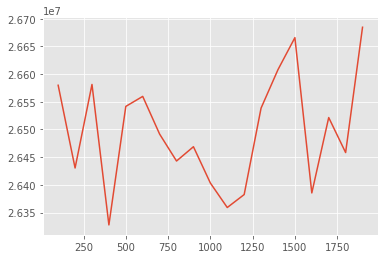

In [45]:
rmse =[]
n = 2000
for depth in range(100,n,100):
        model = RandomForestRegressor(max_depth=depth)
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        rmse.append(np.sqrt(metrics.mean_squared_error(y_test, predictions)))
sns.lineplot(x=range(100,n, 100), y = rmse)


In [46]:
rmse.index(min(rmse))

3

MAE 17,663,564.85
MSE 698,967,291,633,286.88
RMSE 26,437,989.55
MAPE 4.24 %
R^2 58.81 %


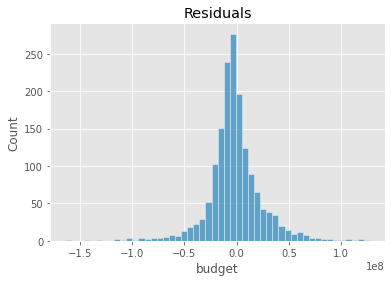

In [47]:
# Rainforest
rf_model = RandomForestRegressor(n_estimators=500)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

plt.title('Residuals')
sns.histplot(y_test - rf_predictions, bins=50)
print(f'MAE {metrics.mean_absolute_error(y_test, rf_predictions):,.2F}')
print(f'MSE {metrics.mean_squared_error(y_test, rf_predictions):,.2F}')
print(f'RMSE {np.sqrt(metrics.mean_squared_error(y_test, rf_predictions)):,.2F}')
print(f'MAPE {metrics.mean_absolute_percentage_error(y_test, rf_predictions):,.2F} %')
print(f'R^2 {metrics.explained_variance_score(y_test, rf_predictions)* 100:,.2F} %')

# Use non null buget data to create a model and impute into all the null budget data!

In [48]:
budget_null.reset_index(inplace=True)
budget_null.drop('index', axis=1, inplace=True)

In [49]:
budget_null.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,Fame,R,Drama,1980,"May 16, 1980 (United States)",6.6,21000.0,Alan Parker,Christopher Gore,Eddie Barth,United States,NaN,21202829.0,Metro-Goldwyn-Mayer (MGM),134.0
1,Stir Crazy,R,Comedy,1980,"December 12, 1980 (United States)",6.8,26000.0,Sidney Poitier,Bruce Jay Friedman,Gene Wilder,United States,NaN,101300000.0,Columbia Pictures,111.0
2,Urban Cowboy,PG,Drama,1980,"June 6, 1980 (United States)",6.4,14000.0,James Bridges,Aaron Latham,John Travolta,United States,NaN,46918287.0,Paramount Pictures,132.0
3,Altered States,R,Horror,1980,"December 25, 1980 (United States)",6.9,33000.0,Ken Russell,Paddy Chayefsky,William Hurt,United States,NaN,19853892.0,Warner Bros.,102.0
4,Little Darlings,R,Comedy,1980,"March 21, 1980 (United States)",6.5,5100.0,Ron Maxwell,Kimi Peck,Tatum O'Neal,United States,NaN,34326249.0,Stephen Friedman/Kings Road Productions,96.0


In [50]:
budget_null.isnull().sum()

name           0
rating         0
genre          0
year           0
released       0
score          0
votes          0
director       0
writer         0
star           0
country        0
budget      1984
gross          0
company        0
runtime        0
dtype: int64

In [51]:
budget_null_temp = budget_null.drop(['name', 'year', 'released', 'country', 'director','writer', 'star', 'company', 'budget'], axis=1)

In [52]:
budget_null_temp.head()

,rating,genre,score,votes,gross,runtime
0,R,Drama,6.6,21000.0,21202829.0,134.0
1,R,Comedy,6.8,26000.0,101300000.0,111.0
2,PG,Drama,6.4,14000.0,46918287.0,132.0
3,R,Horror,6.9,33000.0,19853892.0,102.0
4,R,Comedy,6.5,5100.0,34326249.0,96.0


In [53]:
budget_null_temp = pd.get_dummies(data=budget_null_temp, columns=['rating','genre'], drop_first=True)
budget_null_temp.head()

,score,votes,gross,runtime,rating_NC-17,rating_Not Rated,rating_PG,rating_PG-13,rating_R,rating_TV-MA,...,genre_Crime,genre_Drama,genre_Family,genre_Fantasy,genre_Horror,genre_Mystery,genre_Romance,genre_Sci-Fi,genre_Thriller,genre_Western
0,6.6,21000.0,21202829.0,134.0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,6.8,26000.0,101300000.0,111.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,6.4,14000.0,46918287.0,132.0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,6.9,33000.0,19853892.0,102.0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,6.5,5100.0,34326249.0,96.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


MAE 16,634,999.45
MSE 594,701,943,526,578.50
RMSE 24,386,511.51
MAPE 2.29 %
R^2 69.86 %


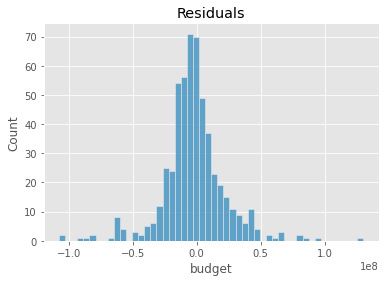

In [54]:
# Using more training data to build the model
X_train, X_test, y_train, y_test = train_test_split(X.drop(['score', 'runtime'], axis=1), y, test_size=0.1, random_state=13)
rf_model = RandomForestRegressor(n_estimators=500)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

plt.title('Residuals')
sns.histplot(y_test - rf_predictions, bins=50)
print(f'MAE {metrics.mean_absolute_error(y_test, rf_predictions):,.2F}')
print(f'MSE {metrics.mean_squared_error(y_test, rf_predictions):,.2F}')
print(f'RMSE {np.sqrt(metrics.mean_squared_error(y_test, rf_predictions)):,.2F}')
print(f'MAPE {metrics.mean_absolute_percentage_error(y_test, rf_predictions):,.2F} %')
print(f'R^2 {metrics.explained_variance_score(y_test, rf_predictions)* 100:,.2F} %')

In [55]:
rf_model.predict(budget_null_temp.drop(['score', 'runtime'], axis=1))

array([21961800.   , 17225400.   , 24857200.   , ...,  4435112.   ,
        7236142.636,  2412011.076])

In [56]:
budget_null['budget']=rf_model.predict(budget_null_temp.drop(['score', 'runtime'], axis=1))

In [57]:
df = pd.concat([budget_notnull, budget_null], ignore_index=True)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7404 entries, 0 to 7403
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7404 non-null   object 
 1   rating    7404 non-null   object 
 2   genre     7404 non-null   object 
 3   year      7404 non-null   int64  
 4   released  7404 non-null   object 
 5   score     7404 non-null   float64
 6   votes     7404 non-null   float64
 7   director  7404 non-null   object 
 8   writer    7404 non-null   object 
 9   star      7404 non-null   object 
 10  country   7404 non-null   object 
 11  budget    7404 non-null   float64
 12  gross     7404 non-null   float64
 13  company   7404 non-null   object 
 14  runtime   7404 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 867.8+ KB


In [59]:
df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [60]:
neg_values = df[df['budget']<0]
neg_values.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      0 non-null      object 
 1   rating    0 non-null      object 
 2   genre     0 non-null      object 
 3   year      0 non-null      int64  
 4   released  0 non-null      object 
 5   score     0 non-null      float64
 6   votes     0 non-null      float64
 7   director  0 non-null      object 
 8   writer    0 non-null      object 
 9   star      0 non-null      object 
 10  country   0 non-null      object 
 11  budget    0 non-null      float64
 12  gross     0 non-null      float64
 13  company   0 non-null      object 
 14  runtime   0 non-null      float64
dtypes: float64(5), int64(1), object(9)
memory usage: 0.0+ bytes


In [61]:
bad_values = sum(df['budget']<0)
good_values = sum(df['budget']>0)

In [62]:
initial_df_count - missing_budget_count
print(f'Initial DF: {initial_df_count}')
print(f'Missing Budget Values: {missing_budget_count}')
print(f'DF stripped of missing values {initial_df_count - missing_budget_count}')
print(f'DF with imputed values: {good_values}')
print(f'Percent of missing values retrieved: {(good_values - (initial_df_count - missing_budget_count)) / missing_budget_count: .2%}')

Initial DF: 7412
Missing Budget Values: 1991
DF stripped of missing values 5421
DF with imputed values: 7404
Percent of missing values retrieved:  99.60%


In [63]:
good_values

7404

In [64]:
df.to_csv('../../_data/_processed/' + 'BudgetImputed.csv', index=False)